List of Programs : https://drive.google.com/file/d/1THErcI5hCBiBV6uoGE42zWtIDyPkIMbb/view?usp=sharing

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data = df['Passengers']

## Week 4

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SES Metrics: {'MAE': 81.44827543044913, 'MSE': 8673.930949885269, 'RMSE': np.float64(93.13394091245827)}
SMA Metrics: {'MAE': 62.34482758620689, 'MSE': 6217.777777777777, 'RMSE': np.float64(78.85288693369303)}
HW Metrics: {'MAE': 67.2523414765224, 'MSE': 6104.525257126512, 'RMSE': np.float64(78.13146137841345)}


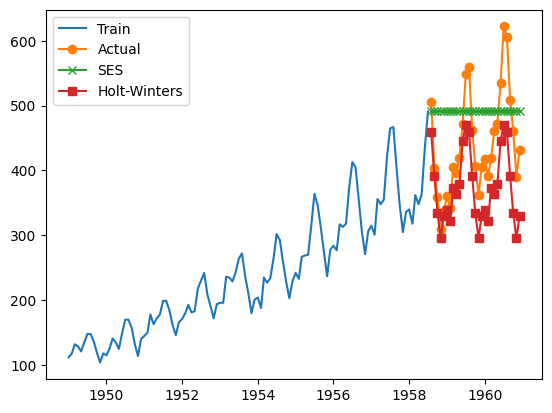

In [ ]:
# ============================================================================
# LAB 4: FORECASTING TECHNIQUES
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# i. Different forecasting techniques

# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train).fit()
ses_pred = ses_model.forecast(len(test))

# Simple Moving Average (SMA)
window = 3
sma_pred = train.rolling(window=window).mean().iloc[-1]
sma_forecast = pd.Series([sma_pred] * len(test), index=test.index)

# Holt-Winters Smoothing
hw_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
hw_pred = hw_model.forecast(len(test))

# ii. Calculate evaluation metrics
def calc_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

print("SES Metrics:", calc_metrics(test, ses_pred))
print("SMA Metrics:", calc_metrics(test, sma_forecast))
print("HW Metrics:", calc_metrics(test, hw_pred))

# iii. Identify trends and seasonal patterns
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, ses_pred, label='SES', marker='x')
plt.plot(test.index, hw_pred, label='Holt-Winters', marker='s')
plt.legend()
plt.show()

## Week 5

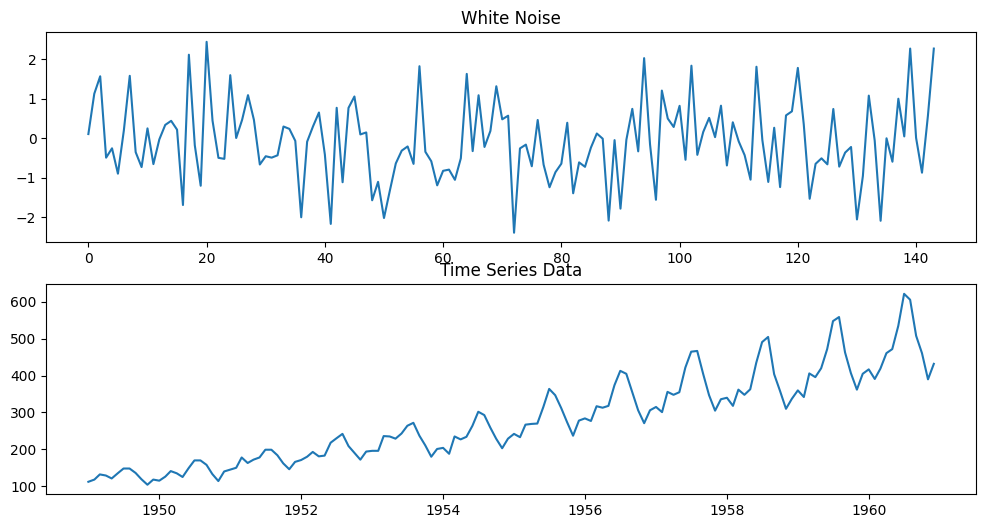

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Stationary: False

KPSS Statistic: 1.6513122354165206
p-value: 0.01


/tmp/ipython-input-3629959495.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(data)


In [ ]:
# ============================================================================
# LAB 5: WHITE NOISE AND STATIONARITY
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# i. Generate white noise
white_noise = np.random.normal(0, 1, len(data))

# ii. Compare graphs
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
axes[0].plot(white_noise)
axes[0].set_title('White Noise')
axes[1].plot(data)
axes[1].set_title('Time Series Data')
plt.show()

# iii. Statistical tests for stationarity
# Augmented Dickey-Fuller Test
adf_result = adfuller(data)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Stationary: {adf_result[1] < 0.05}")

# KPSS Test
kpss_result = kpss(data)
print(f"\nKPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")

## Week 6

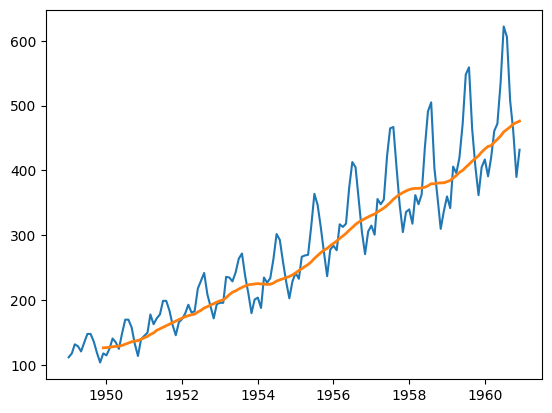

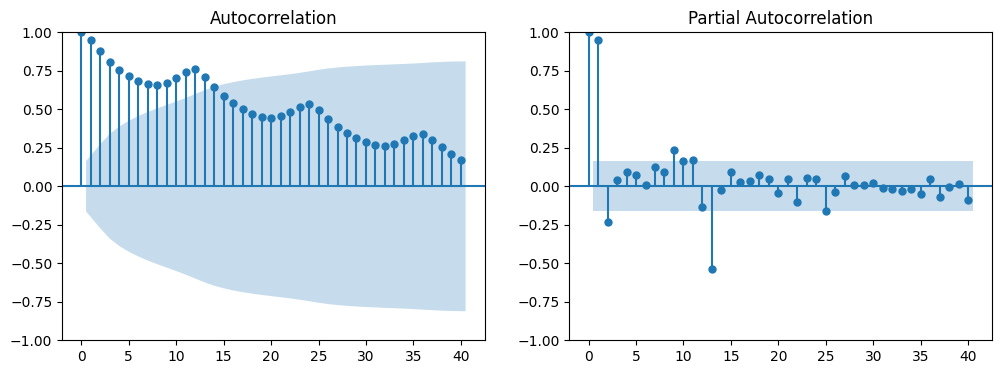

In [ ]:
# ============================================================================
# LAB 6: TREND DETECTION AND ACF/PACF
# ============================================================================

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# i. Detect trends using moving averages
ma_trend = data.rolling(window=12).mean()
plt.plot(data, label='Original')
plt.plot(ma_trend, label='Trend (MA-12)', linewidth=2)
plt.show()

# ii. Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data.dropna(), lags=40, ax=axes[0])
plot_pacf(data.dropna(), lags=40, ax=axes[1])
plt.show()

## Week 7

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will conta

AR(1) AIC: 1078.0541689165111
AR(3) AIC: 1050.4728998359697


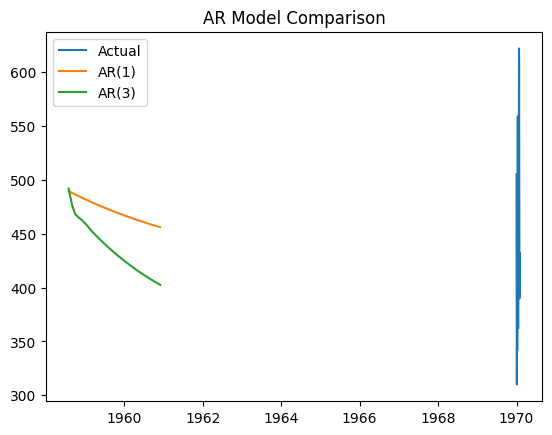

In [ ]:
#============================================================================
# LAB 7: AR MODEL
# ============================================================================

import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# i. Examine ACF and PACF (already plotted above)
# PACF cuts off at lag p → AR(p) model

# ii. Fit AR(1) model
ar1_model = AutoReg(train, lags=1).fit()
ar1_pred = ar1_model.predict(start=len(train), end=len(train)+len(test)-1)
print(f"AR(1) AIC: {ar1_model.aic}")

# iii. Fit higher lag AR models
ar3_model = AutoReg(train, lags=3).fit()
ar3_pred = ar3_model.predict(start=len(train), end=len(train)+len(test)-1)
print(f"AR(3) AIC: {ar3_model.aic}")

plt.plot(test.values, label='Actual')
plt.plot(ar1_pred, label='AR(1)')
plt.plot(ar3_pred, label='AR(3)')
plt.legend()
plt.title('AR Model Comparison')
plt.show()

## Week 8

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wil

MA(1) AIC: 1232.9167281997231
MA(3) AIC: 1113.4620643532558
MA(1) Metrics: {'MAE': 195.31387850057388, 'MSE': 44249.28268526846, 'RMSE': np.float64(210.35513467768848)}
MA(3) Metrics: {'MAE': 182.09335014138193, 'MSE': 41630.97226123116, 'RMSE': np.float64(204.03669341868672)}


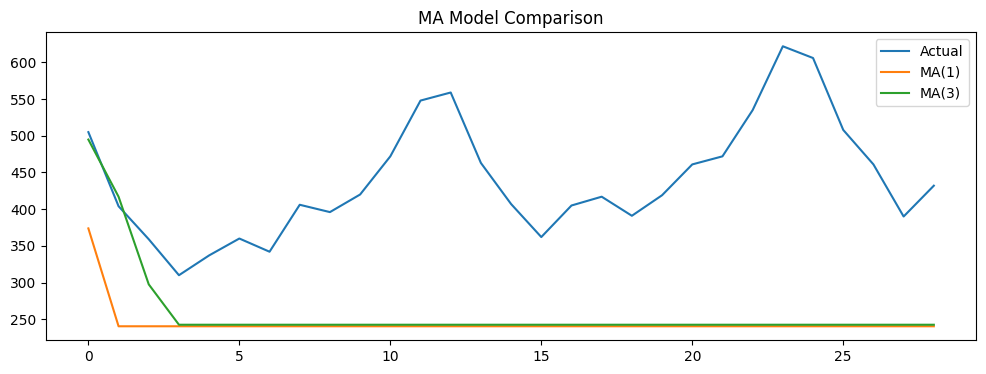

In [ ]:
# ============================================================================
# LAB 8: MA MODEL
# ============================================================================

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# i. Plot ACF and PACF (already done in Lab 6)

# ii. Fit MA(1) model
ma1_model = ARIMA(train, order=(0, 0, 1)).fit()
ma1_pred = ma1_model.forecast(steps=len(test))
print(f"MA(1) AIC: {ma1_model.aic}")

# iii. Fit higher lag MA model
ma3_model = ARIMA(train, order=(0, 0, 3)).fit()
ma3_pred = ma3_model.forecast(steps=len(test))
print(f"MA(3) AIC: {ma3_model.aic}")

# iv. Compare performances
print("MA(1) Metrics:", calc_metrics(test, ma1_pred))
print("MA(3) Metrics:", calc_metrics(test, ma3_pred))

plt.figure(figsize=(12, 4))
plt.plot(test.values, label='Actual')
plt.plot(ma1_pred.values, label='MA(1)')
plt.plot(ma3_pred.values, label='MA(3)')
plt.legend()
plt.title('MA Model Comparison')
plt.show()

## Week 9

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARMA(1,1) Summary:
                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -535.037
Date:                Thu, 27 Nov 2025   AIC                           1078.074
Time:                        06:13:04   BIC                           1089.053
Sample:                    01-01-1949   HQIC                          1082.530
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        256.3957     57.377      4.469      0.000     143.939     368.852
ar.L1          0.9469      0.040     23.488      0.000       0.868       1.026
ma.L1          0.4798      0.088 

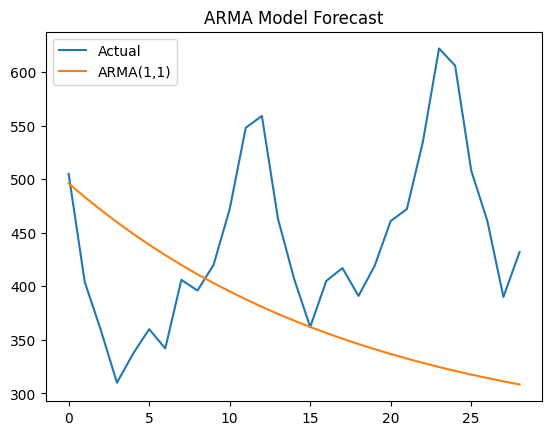

In [ ]:
# ============================================================================
# LAB 9: ARMA MODEL
# ============================================================================

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# i. Initialize ARMA model
arma_model = ARIMA(train, order=(1, 0, 1))

# ii. Train the model
arma_fit = arma_model.fit()
print(f"ARMA(1,1) Summary:\n{arma_fit.summary()}")

# iii. Generate forecasts
arma_pred = arma_fit.forecast(steps=len(test))
print("ARMA Metrics:", calc_metrics(test, arma_pred))

plt.plot(test.values, label='Actual')
plt.plot(arma_pred.values, label='ARMA(1,1)')
plt.legend()
plt.title('ARMA Model Forecast')
plt.show()

## Week 10

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1,1,1) Summary:
                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -526.123
Date:                Thu, 27 Nov 2025   AIC                           1058.246
Time:                        06:13:21   BIC                           1066.454
Sample:                    01-01-1949   HQIC                          1061.577
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5111      0.114     -4.488      0.000      -0.734      -0.288
ma.L1          0.9144      0.056     16.251      0.000       0.804       1.025
sigma2       592.7851    101.2

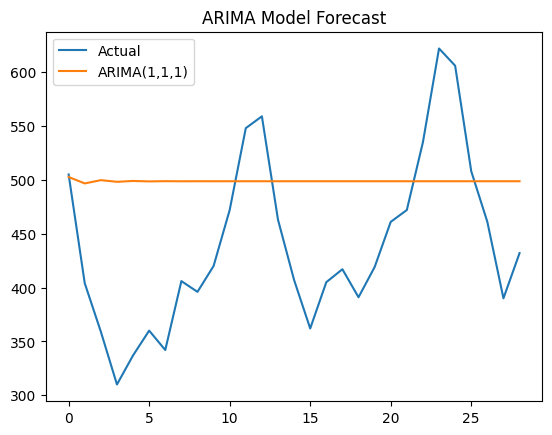

In [ ]:
# ============================================================================
# LAB 10: ARIMA MODEL
# ============================================================================

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# i. Initialize ARIMA model with p, d, q parameters
# p=1 (AR terms), d=1 (differencing), q=1 (MA terms)
arima_model = ARIMA(train, order=(1, 1, 1))

# ii. Train the model
arima_fit = arima_model.fit()
print(f"ARIMA(1,1,1) Summary:\n{arima_fit.summary()}")

# iii. Generate forecasts
arima_pred = arima_fit.forecast(steps=len(test))
print("ARIMA Metrics:", calc_metrics(test, arima_pred))

plt.plot(test.values, label='Actual')
plt.plot(arima_pred.values, label='ARIMA(1,1,1)')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()